# Inferência Estatística

In [98]:
import numpy as np
import pandas as pd 
import random
import matplotlib.pyplot as plt

In [3]:
plt.style.use('bmh')

## Análise dos dados de acidentes em Barcelona em 2013

O conjunto de dados referem-se a acidentes de trânsito em Barcelona ocorridos em 2013. Os dados originais podem ser encontrados nessse endereço: [http://opendata.bcn.cat/](http://opendata.bcn.cat/).

In [4]:
data = pd.read_csv('../data/ACCIDENTS_GU_BCN_2013.csv', encoding = 'unicode_escape', engine ='python')
data.head()

,Número d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia de setmana,...,Hora de dia,Descripció torn,Descripció causa vianant,Número de morts,Número de lesionats lleus,Número de lesionats greus,Número de víctimes,Número de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X)
0,2013S007360,-1,Desconegut,-1--1--1,Desconegut,-1,Desconegut,Desconegut,Dimecres,3,...,21,Tarda,Desconegut,0,1,0,1,2,-1,-1
1,2013S007723,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,152600,Guinardó,0028 0032,Dimarts,2,...,21,Tarda,Desconegut,0,1,0,1,2,"4585218,67","431621,41"
2,2013S005373,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,134801,Freser,0053 0053,Dimarts,2,...,10,Matí,Creuar per fora pas de vianants,0,1,0,1,1,"4585049,89","431605,09"
3,2013S001486,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161407,Indústria,0224 0224,Dimarts,2,...,10,Matí,Altres,0,1,0,1,1,"4584836,20","431302,26"
4,2013S008254,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161101,Independència,0357 0357,Dilluns,1,...,16,Tarda,Desconegut,0,1,0,1,2,"4584704,26","431385,76"


In [5]:
data['Date'] = data['Dia de mes'].apply(lambda x: str(x)) + '-' + data['Mes de any'].apply(lambda x: str(x)) + '-2013'
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [6]:
data.head(2)

,Número d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia de setmana,...,Descripció torn,Descripció causa vianant,Número de morts,Número de lesionats lleus,Número de lesionats greus,Número de víctimes,Número de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X),Date
0,2013S007360,-1,Desconegut,-1--1--1,Desconegut,-1,Desconegut,Desconegut,Dimecres,3,...,Tarda,Desconegut,0,1,0,1,2,-1,-1,2013-10-16
1,2013S007723,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,152600,Guinardó,0028 0032,Dimarts,2,...,Tarda,Desconegut,0,1,0,1,2,"4585218,67","431621,41",2013-10-29


In [7]:
accidents = data.groupby(['Date']).size()
print(f"A média de acidentes por dia no ano de 2013 foi de {accidents.mean():.1f}.")

A média de acidentes por dia no ano de 2013 foi de 25.9.


### Distribuição das médias amostrais

Consideremos a distribuição empírica das médias de $s = 10.000$ amostras com tamanho $n = 200$.

In [8]:
# população
df = accidents.to_frame()
N_test = 10000
elements = 200
# array de médias das amostras
means = np.zeros(N_test)
# geração das amostras
for i in range(N_test):
    rows = np.random.choice(df.index.values, elements)
    sampled_df = df.loc[rows]
    means[i] = sampled_df.values.mean()

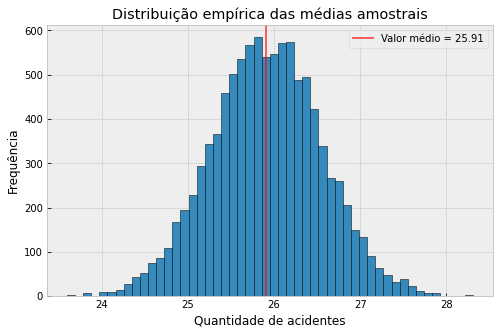

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.hist(means, bins=50, edgecolor='k')
plt.axvline(means.mean(), color='r', alpha=.6, label=f"Valor médio = {means.mean():.2f}")
ax.set_axisbelow(True)
ax.set_xlabel('Quantidade de acidentes')
ax.set_ylabel('Frequência')
ax.set_title('Distribuição empírica das médias amostrais')
plt.legend()
plt.show()

- Erro padrão ($SE$):

$$SE = \dfrac{\sigma_x}{\sqrt{n}}$$

In [10]:
rows = np.random.choice(df.index.values, elements)
sampled_df = df.loc[rows]
est_sigma_mean = sampled_df.values.std() / np.sqrt(elements)

print(f"""
    Estimativa direta de SE para uma amostra de {elements} elementos: {est_sigma_mean:.4f}.
    Estimativa de SE por simulação de {N_test} amostras de {elements} elementos: {np.array(means).std():.5f}.
""")


    Estimativa direta de SE para uma amostra de 200 elementos: 0.6399.
    Estimativa de SE por simulação de 10000 amostras de 200 elementos: 0.64086.



### Método de _bootstrap_

In [20]:
def meanBootstrap(X, numberb):
    x = np.zeros(numberb)
    for i in range(numberb):
        sample = [X[j] for j in np.random.randint(len(X), size=len(X))]
        x[i] = np.mean(sample)
    return x

In [22]:
m = meanBootstrap(accidents.to_numpy(), 10000)
print(f"Média estimada: {np.mean(m):.2f}")

Média estimada: 25.92


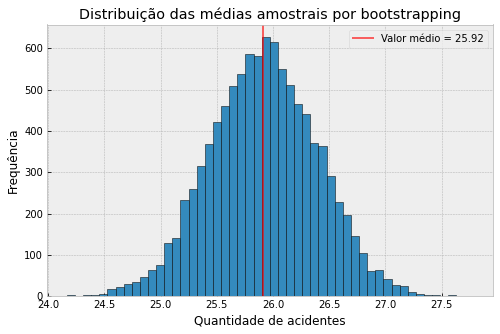

In [27]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.hist(m, bins=50, edgecolor='k')
plt.axvline(m.mean(), color='r', alpha=.6, label=f"Valor médio = {m.mean():.2f}")
ax.set_axisbelow(True)
ax.set_xlabel('Quantidade de acidentes')
ax.set_ylabel('Frequência')
ax.set_title('Distribuição das médias amostrais por bootstrapping')
plt.legend()
plt.show()

### Intervalos de confiança

$$IC = \left[ \overline{x} - z \cdot SE, \overline{x} + z \cdot SE \right]$$

In [28]:
m = accidents.values.mean()
se = accidents.values.std() / np.sqrt(len(accidents))
z = 1.96
ci  = (m - z * se, m + z * se)

print(f"Intervalo de confiança: [{ci[0]:.2f}, {ci[1]:.2f}]")

Intervalo de confiança: [24.98, 26.84]


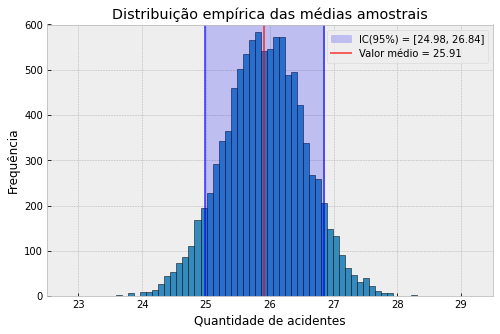

In [79]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.hist(means, bins=50, edgecolor='k')
plt.axvline(ci[0], color='blue', alpha=.6)
plt.axvline(ci[1], color='blue', alpha=.6)
plt.fill_betweenx(np.arange(0,700,100), ci[0], ci[1], color='blue', alpha=.2, label=f"IC(95%) = [{ci[0]:.2f}, {ci[1]:.2f}]")
plt.axvline(m, color='r', alpha=.6, label=f"Valor médio = {m:.2f}")
ax.set_axisbelow(True)
ax.set_xlabel('Quantidade de acidentes')
ax.set_ylabel('Frequência')
ax.set_title('Distribuição empírica das médias amostrais')
ax.set_ylim((0,600))
ax.set_xlim((22.5,29.5))
plt.legend()
plt.show()

### Teste de Hipóteses usando Intervalos de Confiança

In [80]:
def get_data(year=2010):
    data = pd.read_csv(f'../data/ACCIDENTS_GU_BCN_{year}.csv', encoding='latin-1')
    data['Date'] = str(year) + '-' + data['Mes de any'].apply(lambda x: str(x)) + '-' + data['Dia de mes'].apply(lambda x: str(x))
    data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")
    return data

In [81]:
data1 = get_data(2010)
data2 = get_data(2013)

In [82]:
data1.head(3)

,Número d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia de setmana,...,Descripció torn,Descripció causa vianant,Número de morts,Número de lesionats lleus,Número de lesionats greus,Número de víctimes,Número de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X),Date
0,2010S003688,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,209900,Meridiana,0181 0181,Divendres,5,...,Tarda,Desconegut,0,0,0,0,1,"4584941,35","432017,96",2010-05-28
1,2010S007597,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,346402,Trinxant,0014 0014,Dilluns,1,...,Matí,Desconegut,0,1,0,1,2,"4585041,70","432014,69",2010-11-08
2,2010S001390,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0314 0316,Dijous,4,...,Matí,Desconegut,0,1,0,1,1,"4585117,42","431401,23",2010-02-25


In [83]:
data2.head(3)

,Número d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia de setmana,...,Descripció torn,Descripció causa vianant,Número de morts,Número de lesionats lleus,Número de lesionats greus,Número de víctimes,Número de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X),Date
0,2013S007360,-1,Desconegut,-1--1--1,Desconegut,-1,Desconegut,Desconegut,Dimecres,3,...,Tarda,Desconegut,0,1,0,1,2,-1,-1,2013-10-16
1,2013S007723,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,152600,Guinardó,0028 0032,Dimarts,2,...,Tarda,Desconegut,0,1,0,1,2,"4585218,67","431621,41",2013-10-29
2,2013S005373,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,134801,Freser,0053 0053,Dimarts,2,...,Matí,Creuar per fora pas de vianants,0,1,0,1,1,"4585049,89","431605,09",2013-07-23


In [84]:
counts2010 = data1['Date'].value_counts()
counts2013 = data2['Date'].value_counts()

In [96]:
head = f"{'Ano':<6s} {'Média':>8s} {'Intervalo de Confiança (95%)':<20s}"
print('=' * len(head))
print(head)
print('-' * len(head))
for item in zip(['2010', '2013'], [counts2010, counts2013]):
    year = item[0]
    mean = item[1].mean()
    n = len(item[1])
    s = item[1].std()
    ci = [mean - s * 1.96 / np.sqrt(n), mean + s * 1.96 / np.sqrt(n)]
    print(f"{year:<6s} {mean:>8.4f} [{ci[0]:>12.4f}, {ci[1]:>12.4f}]")
print('-' * len(head))

Ano       Média Intervalo de Confiança (95%)
--------------------------------------------
2010    24.8110 [     23.9329,      25.6890]
2013    25.9096 [     24.9752,      26.8440]
--------------------------------------------


A estimativa da média de acidentes em cada ano sugere que a taxa de acidentes em 2013 foi maior do que em 2010. Mas esse efeito é estatisticamente significante?

Como a média estimada para 2010 (24.8110) está fora do intervalo de confiança da faixa de valores plausíveis de 2013, dizemos que a hipótese alternativa não pode ser rejeitada. Nesse sentido, com 95% de confiança, a média de acidentes em 2013 foi maior que a média de acidentes em 2010.

### Testes de Hipóteses usando $p$-valor

In [114]:
x = counts2010
y = counts2013

m = len(x)
n = len(y)

p = y.mean() - x.mean()

pool = np.concatenate([x,y])
np.random.shuffle(pool)

N = 10000
diff = np.zeros(N)
for i in range(N):
    p1 = [random.choice(pool) for _ in range(n)]
    p2 = [random.choice(pool) for _ in range(n)]
    diff[i] = (np.mean(p1) - np.mean(p2))

In [117]:
w1 = np.where(diff > p)[0]

p_value = len(w1) / float(N)
print(f"""
    p-valor (Simulação): {p_value:.4f} ({100 * p_value:.2f}%)
    Diferença: {p:.4f}
""")

if p_value < 0.05:
    print('O efeito é significante.')
else:
    print('O efeito é não significante.')


    p-valor (Simulação): 0.0442 (4.42%)
    Diferença: 1.0986

O efeito é significante.
